# 付録B  演習の解答

演習に登場するソースコードの抜粋

## 演習 1-5

In [ ]:
p = 1000
r = 0.05
t = 3
n = 12

a = p * (1 + (r/n))**(n * t)

print(a)

1161.4722313334678


## 演習 1-6

In [ ]:
from math import exp

p = 1000 # 元本、開始時の金額
r = 0.05 # 年ごとの金利
t = 3.0 # 年数

a = p * exp(r*t)

print(a)

1161.834242728283


## 演習1-7

In [ ]:
from sympy import *

# SymPyで'x'を定義する
x = symbols('x')

# Pythonの構文で関数を宣言する
f = 3*x**2 + 1

# この関数の導関数を求める
dx_f = diff(f)
dx_f

6*x

In [ ]:
dx_f.subs(x,3)

18

## 演習1-8

In [ ]:
from sympy import *

# SymPyで'x'を定義する
x = symbols('x')

# Pythonの構文で関数を宣言する
f = 3*x**2 + 1
f

3*x**2 + 1

In [ ]:
# 関数をxについて積分し、x = 0から2の範囲の面積を求める
area = integrate(f, (x, 0, 2))
area

10

## 演習 2-4

In [ ]:
from scipy.stats import binom

n = 137
p = 0.40

p_50_or_more_noshows = 0.0

for x in range(50,138):
    p_50_or_more_noshows += binom.pmf(x, n, p)

print(p_50_or_more_noshows)

0.8220955881474251


## 演習2-5

In [ ]:
from scipy.stats import beta

heads = 8
tails = 2

p = 1.0 - beta.cdf(0.5, heads, tails)

print(p)

0.98046875


## 演習3-1

In [ ]:
from math import sqrt

sample = [1.78, 1.75, 1.72, 1.74, 1.77]

def mean(values):
    return sum(values) /len(values)

def variance_sample(values):
    mean = sum(values) / len(values)
    var = sum((v - mean) ** 2 for v in values) / len(values)
    return var

def std_dev_sample(values):
    return sqrt(variance_sample(values))

mean = mean(sample)
std_dev = std_dev_sample(sample)

print("MEAN（平均）: ", mean)
print("STD DEV（標準偏差）: ", std_dev)

MEAN（平均）:  1.752
STD DEV（標準偏差）:  0.02135415650406264


## 演習3-2

In [ ]:
from scipy.stats import norm

mean = 42
std_dev = 8

x = norm.cdf(30, mean, std_dev) - norm.cdf(20, mean, std_dev)

print(x)

0.06382743803380352


## 演習3-3

In [ ]:
from math import sqrt
from scipy.stats import norm

def critical_z_value(p, mean=0.0, std=1.0):
    norm_dist = norm(loc=mean, scale=std)
    left_area = (1.0 - p) / 2.0
    right_area = 1.0 - ((1.0 - p) / 2.0)
    return norm_dist.ppf(left_area), norm_dist.ppf(right_area)


def ci_large_sample(p, sample_mean, sample_std, n):
    # 標本のサイズは31以上にする

    lower, upper = critical_z_value(p)
    lower_ci = lower * (sample_std / sqrt(n))
    upper_ci = upper * (sample_std / sqrt(n))

    return sample_mean + lower_ci, sample_mean + upper_ci


print(ci_large_sample(p=0.99, sample_mean=1.715588,
    sample_std=0.029252, n=34))

(np.float64(1.7026658973748656), np.float64(1.7285101026251342))


## 演習3-4

In [ ]:
from scipy.stats import norm

mean = 10345
std_dev = 552

p1 = 1.0 - norm.cdf(11641, mean, std_dev)

# 対称性を利用する
p2 = p1

# 両側のp値
# 単純に値を2倍するだけでも求められる
p_value = p1 + p2

print("Two-tailed P-value", p_value)
if p_value <= 0.05:
    print("Passes two-tailed test")
else:
    print("Fails two-tailed test")

Two-tailed P-value 0.01888333596496139
Passes two-tailed test


## 演習4-1

In [ ]:
from numpy import array

v = array([1,2])

i_hat = array([2, 0])
j_hat = array([0, 1.5])

# 直線を当てはめる
basis = array([i_hat, j_hat])

# 内積によりベクトルvをwに変換する
w = basis.dot(v)

print(w)

[2. 3.]


## 演習4-2

In [ ]:
from numpy import array

v = array([1,2])

i_hat = array([-2, 1])
j_hat = array([1, -2])

# 直線を当てはめる
basis = array([i_hat, j_hat])

# 内積によりベクトルvをwに変換する
w = basis.dot(v)

print(w)

[ 0 -3]


## 演習4-3

In [ ]:
import numpy as np
from numpy.linalg import det

i_hat = np.array([1, 0])
j_hat = np.array([2, 2])

basis = np.array([i_hat,j_hat]).transpose()

determinant = det(basis)

print(determinant)

2.0


## 演習4-5

In [ ]:
from numpy import array
from numpy.linalg import inv

A = array([
    [3, 1, 0],
    [2, 4, 1],
    [3, 1, 8]
])

B = array([
    54,
    12,
    6
])

X = inv(A).dot(B)

print(X)

[19.8 -5.4 -6. ]


## 演習4-6

In [ ]:
from numpy.linalg import det
from numpy import array

i_hat = array([2, 6])
j_hat = array([1, 3])

basis = array([i_hat, j_hat]).transpose()
print(basis)

determinant = det(basis)

print(determinant)

[[2 1]
 [6 3]]
0.0


##演習 4-6 別解

SymPyを使えば、浮動小数点の誤差を回避して正確に0が得られます。

In [ ]:
from sympy import *

basis = Matrix([
    [2,1],
    [6,3]
])
basis

Matrix([
[2, 1],
[6, 3]])

In [ ]:
determinant = det(basis)
determinant

0

## 演習5-1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# データを読み込む
df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

# 入力変数（すべての行、最終列を除くすべての列）を抽出する
X = df.values[:, :-1]

# 出力列（すべての行、最終列）を抽出する
Y = df.values[:, -1]

# データに直線を当てはめる
fit = LinearRegression().fit(X, Y)

m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))

m = [1.75919315]
b = [4.69359655]


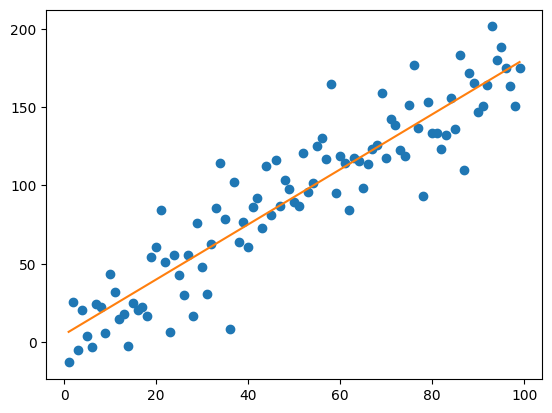

In [ ]:
# チャートを表示する
plt.plot(X, Y, 'o') # 散布図
plt.plot(X, m*X+b) # 直線
plt.show();

## 演習5-2

In [ ]:
import pandas as pd

# データをPandasのデータフレームとして読み込む
df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

# 変数間の相関係数を求め、二乗して表示する
correlations = df.corr(method='pearson')
correlations

,x,y
x,1.00000,0.92421
y,0.92421,1.00000


In [ ]:
# 統計的有意性を確かめる
from scipy.stats import t
from math import sqrt

# 標本のサイズ
n = df.shape[0]
print(n)
lower_cv = t(n - 1).ppf(0.025)
upper_cv = t(n - 1).ppf(0.975)

# 相関係数を求める
r = correlations["y"]["x"]

# 検定を実行する
test_value = r / sqrt((1 - r ** 2) / (n - 2))

print("TEST VALUE: {}".format(test_value))
print("CRITICAL RANGE: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
    print("CORRELATION PROVEN, REJECT H0")
else:
    print("CORRELATION NOT PROVEN, FAILED TO REJECT H0 ")

99
TEST VALUE: 23.835515323677328
CRITICAL RANGE: -1.9844674544266925, 1.984467454426692
CORRELATION PROVEN, REJECT H0


In [ ]:
# p値を求める
if test_value > 0:
    p_value = 1.0 - t(n - 1).cdf(test_value)
else:
    p_value = t(n - 1).cdf(test_value)

# 両側検定のため結果を2倍する
p_value = p_value * 2
print("P-VALUE: {}".format(p_value))

P-VALUE: 0.0


## 演習5-3

In [ ]:
import pandas as pd
from scipy.stats import t
from math import sqrt

# データを読み込む
points = list(pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",") \
    .itertuples())

n = len(points)

# 線形回帰直線
m = 1.75919315
b = 4.69359655

# x = 50に対する予測区間を求める
x_0 = 50
x_mean = sum(p.x for p in points) / len(points)

t_value = t(n - 2).ppf(0.975)

standard_error = sqrt(sum((p.y - (m * p.x + b)) ** 2 for p in points) / \
    (n - 2))

margin_of_error = t_value * standard_error * \
                  sqrt(1 + (1 / n) + (n * (x_0 - x_mean) ** 2) / \
                       (n * sum(p.x ** 2 for p in points) - \
    sum(p.x for p in points) ** 2))

predicted_y = m*x_0 + b

# 予測区間の計算
print(predicted_y - margin_of_error, predicted_y + margin_of_error)

50.7920864989629 134.5144216010371


## 演習5-4

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

# 入力変数（すべての行、最終列を除くすべての列）を抽出する
X = df.values[:, :-1]

# 出力列（すべての行、最終列）を抽出する
Y = df.values[:, -1]

# 単純な線形回帰（単回帰）を実行する
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("MSE: mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))

[0.86119665 0.78237719 0.85733887]
MSE: mean=0.834 (stdev-0.036)


## 演習6-1

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score


# データを読み込む
df = pd.read_csv("https://bit.ly/3imidqa", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

kfold = KFold(n_splits=3, shuffle=True)
model = LogisticRegression(penalty=None)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy Mean: %.3f (stdev=%.3f)" % (results.mean(), results.std()))

Accuracy Mean: 0.999 (stdev=0.002)


## 演習6-2


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# データを読み込む
df = pd.read_csv("https://bit.ly/3imidqa", delimiter=",")

# 入力変数（すべての行、最終列を除くすべての列）を抽出する
X = df.values[:, :-1]

# 出力列（すべての行、最終列）を抽出する
Y = df.values[:, -1]

model = LogisticRegression(solver='liblinear')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

"""
混同行列は、カテゴリごとの予測の精度を評価するものです。
[[真陽性（True Positives）  偽陰性（False Negatives）]
 [偽陽性（False Positives） 真陰性（True Negatives）]]
この行列の左上から右下の対角線上の値は正しい予測を表しており、
これらの値が大きいほどよい結果になります。
"""
matrix = confusion_matrix(y_true=Y_test, y_pred=prediction)
print(matrix)

[[163   5]
 [  2 274]]


In [ ]:
matrix_df = pd.DataFrame(matrix, index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])
matrix_df

,Predicted Positive,Predicted Negative
Actual Positive,163,5
Actual Negative,2,274


## 演習6-3

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split

# データを読み込む
df = pd.read_csv("https://bit.ly/3imidqa", delimiter=",")

# 入力変数（すべての行、最終列を除くすべての列）を抽出する
X = df.values[:, :-1]

# 出力列（すべての行、最終列）を抽出する
Y = df.values[:, -1]

model = LogisticRegression(solver='liblinear')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33)
model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
prediction = model.predict(X_test)

# 予測を実行する
while True:
    n = input("Input a color {red},{green},{blue}: ")
    (r, g, b) = n.split(",")
    x = model.predict(np.array([[int(r), int(g), int(b)]]))
    if model.predict(np.array([[int(r), int(g), int(b)]]))[0] == 0.0:
        print("LIGHT")
    else:
        print("DARK")

Input a color {red},{green},{blue}: 0,0,0
LIGHT
Input a color {red},{green},{blue}: 255,255,255
DARK


## 演習7 例 B-1

In [ ]:
import pandas as pd
# データを読み込む
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('https://tinyurl.com/y6r7qjrp', delimiter=",")

# 入力変数（すべての行、最終列を除くすべての列）を抽出する
X = df.values[:, :-1]

# 出力列（すべての行、最終列）を抽出する
Y = df.values[:, -1]

# 訓練用データセットとテスト用データセットに分割する
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(3, ),
                   activation='relu',
                   max_iter=100_000,
                   learning_rate_init=0.05)

nn.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(3,), learning_rate_init=0.05, max_iter=100000,
              solver='sgd')

In [ ]:
print("Training set score: %f" % nn.score(X_train, Y_train))
print("Test set score: %f" % nn.score(X_test, Y_test))

Training set score: 0.555556
Test set score: 0.500000


In [ ]:
print("Confusion matrix:")
matrix = confusion_matrix(y_true=Y_test, y_pred=nn.predict(X_test))
matrix_df = pd.DataFrame(matrix, index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])
matrix_df

Confusion matrix:


,Predicted Positive,Predicted Negative
Actual Positive,9,0
Actual Negative,9,0
